In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
dataset_path = "qkd_attack_dataset_v3.csv"
df = pd.read_csv(dataset_path)

In [ ]:
features = [
    "Num_Qubits_Sent", "Num_Qubits_Measured_Correctly", "QBER",
    "Photon_Splitting_Prob", "Intercept_Resend_Prob",
    "Eavesdropper_Success_Rate", "Final_Key_Length"
]
X = df[features]
y = df["Attack_Detected"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],  
    'max_depth': [10, 20, 30, None], 
    'min_samples_split': [2, 4, 6], 
    'min_samples_leaf': [1, 2, 4], 
    'bootstrap': [True] 
}

grid_search = GridSearchCV(rf, param_grid, cv=5, verbose=2,scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy', verbose=2)

In [ ]:
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8985
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1314
           1       0.96      0.73      0.83       686

    accuracy                           0.90      2000
   macro avg       0.92      0.86      0.88      2000
weighted avg       0.91      0.90      0.89      2000



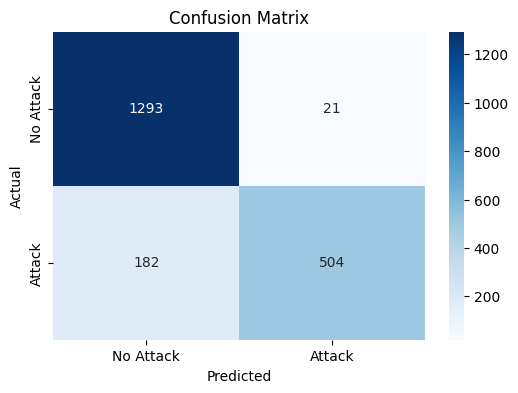

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["No Attack", "Attack"], yticklabels=["No Attack", "Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()